<a href="https://colab.research.google.com/github/scottlynn73/python_training/blob/main/Python_programming_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case study- using Python to analyse a dataset

We will download a set of meteorological data for Glasgow Airport in 2023, and use python to analyse the data.

We will cover:
* Acquiring the data from a public website

* Reading the data from a file into our python project

* Exploring key characteristics like the number of observations, how much of the data is missing, how 'messy' it is.

* Plotting of variables over time (e.g. wind speed, temperature)

* Calculating average, min, max and percentile values.

* Downloading our project as a document

# Meteorological data website

https://mesonet.agron.iastate.edu/request/download.phtml?network=GB__ASOS

This website has many years of hourly data for almost every surface meteorological station sited at an airport in the world.

Lets take a look at what the website has available- then we'll **find and download the data for Glasgow Airport in 2023**.

## 1. Download the surface weather data
Go to the URL above and in the top menu click:

1. `Networks` then `ASOS/AWOS Airports`

2. Under `Historial data` on the right, click `Download raw observations from the archive`

3. Beside the `Switch network` button, and open the dropdown menu and find `Great Britain ASOS`. Now click the `Switch network`- you should see a map of UK weather stations.

**I'll quickly show you around the site- we'll do these steps together**

1. Use the site selection tool to find Glasgow Airport, and add it to the list of Selected Stations.

2. Under `Select from Available Data` select the following ones (by selecting them one at a time with the CTRL (Windows) or Command (Mac) key held down)-

3. Under `Select Date Range` set the dates to 1st January 2023 to 31st January 2023.

4. Leave the timezone as `UTC`

5. Under `Download Options` choose `Comma delimited`

6. You don't need latitude and longitude, or elevation so set those to `No`. These only add the location of the station, but its the same value thousands of times in the added columns.

7. `How to represent missing data`- I recommend setting this to `blank/empty string`- this makes it easier to read the data into python later. Do the same for the `Tracer reports`.

8. In the next dropdown, set it to `Save result data file on computer`- the other option returns the data to the screen so you could also do that and copy/paste into Excel or a text editor- but that's not very efficient.

9. Under `Limit Report Types` uncheck all except the `Routine / Once Hourly` fields- hourly will give us 8760 rows which is plenty for our needs.

10. Download the data to your computer, somewhere easy to find preferably.

11. You should have a file called `EGPF.csv`- this is the hourly meteorological data we specified.

12. Lets have a quick look at the file and see what's in it.


### Variables available in the files

* `station`: three or four character site identifier
* `valid`: timestamp of the observation
* `tmpf`: Air Temperature in Fahrenheit, typically @ 2 meters
* `dwpf`: Dew Point Temperature in Fahrenheit, typically @ 2 meters
* `relh`: Relative Humidity in %
* `drct`: Wind Direction in degrees from *true* north
* `sknt`: Wind Speed in knots
* `p01i`: One hour precipitation for the period from the observation time to the time of the previous hourly precipitation reset, in inches
* `alti`: Pressure altimeter in inches
* `mslp`: Sea Level Pressure in millibar
* `vsby`: Visibility in miles
* `gust`: Wind Gust in knots
* `skyc1 to 4`: Sky Level 1 to 4 Coverage (clouds at different heights)
* `skyl1 to 4`: Sky Level 1 to 4 Altitude (cloud height)
* `wxcodes`: Present Weather Codes (space seperated)
* `feel: Apparent Temperature (Wind Chill or Heat Index) in Fahrenheit
* `ice_accretion_1hr`: Ice Accretion over 1 Hour (inches)
* `ice_accretion_3hr`: Ice Accretion over 3 Hours (inches)
* `ice_accretion_6hr`: Ice Accretion over 6 Hours (inches)
* `peak_wind_gust`: Peak Wind Gust (from PK WND METAR remark) (knots)
* `peak_wind_drct`: Peak Wind Gust Direction (from PK WND METAR remark) (deg)
* `peak_wind_time`:Peak Wind Gust Time (from PK WND METAR remark)
* `metar`:unproressed reported observation in METAR format


## 2. Upload a data file from the local computer
Now we will upload the met data file into Google Colab so we can start analysing it with python.

On the left of this window- click the folder icon- then the upload button, find and upload the met data file.

You should see the file added into the temporary directory attached to this notebook.

The data is ready to use!

## 3. Read the data file with python
We will use the `pandas` library to read the .csv file into a DataFrame- this is a 2D table that's similar to a spreadsheet.

The examples below will show you how to generate statistics, plots and useful insights about the data we downloaded.

First we will **import pandas**- this is how we tell python we want to use libraries (like extensions) for certain tasks. Pandas is the most popular library for handling datasets in Python. We'll look at some other popular ones later when we do some plotting.


In [ ]:
# this is a comment, its a note to yourself usually explaining the steps in the
# process. Comments can have more than one line, but each needs a # at the start

# import the pandas library, and rename it to pd to save on typing later
import pandas as pd

In [ ]:
### Read our .csv into a pandas dataframe
df = pd.read_csv('/content/EGPF.csv')

In [ ]:
# Our csv was read in, lets check the top of it
print(df.head(10)) # 'show me the top 10 rows'

  station             valid  tmpc  dwpc    relh   drct  sped  mslp  p01m  \
0    EGPF  2023-01-01 00:50   2.0   1.0   93.08   60.0  6.90   NaN   0.0   
1    EGPF  2023-01-01 01:50   2.0   1.0   93.08    NaN  2.30   NaN   0.0   
2    EGPF  2023-01-01 02:50   1.0   0.0   93.03  290.0  3.45   NaN   0.0   
3    EGPF  2023-01-01 03:50   1.0   0.0   93.03  270.0  3.45   NaN   0.0   
4    EGPF  2023-01-01 04:50   1.0   1.0  100.00  260.0  3.45   NaN   0.0   
5    EGPF  2023-01-01 05:50   1.0   1.0  100.00  230.0  4.60   NaN   0.0   
6    EGPF  2023-01-01 06:50   1.0   1.0  100.00  230.0  3.45   NaN   0.0   
7    EGPF  2023-01-01 07:50   1.0   1.0  100.00  250.0  3.45   NaN   0.0   
8    EGPF  2023-01-01 08:50   1.0   1.0  100.00  230.0  4.60   NaN   0.0   
9    EGPF  2023-01-01 09:50   1.0   1.0  100.00    NaN  2.30   NaN   0.0   

   p01i  vsby skyc1 skyc2 skyc3  
0   0.0  4.97   OVC   ///   NaN  
1   0.0  2.67   BKN   OVC   NaN  
2   0.0  1.62   BKN   OVC   ///  
3   0.0  2.17   BKN   OVC  

In [ ]:
### Show how many rows are in the dataset we called 'df'
print("There are:")
print(len(df))
print("rows in the dataset.")

There are:
8736
rows in the dataset.


In [ ]:
### Show a high level statistical summary of the dataset
print(df.describe())

              tmpc         dwpc         relh         drct         sped  mslp  \
count  8736.000000  8736.000000  8736.000000  7962.000000  8736.000000   0.0   
mean      9.936928     6.736951    81.824062   176.165536     9.494082   NaN   
std       5.621594     4.959244    13.021452    90.245818     6.037303   NaN   
min      -9.000000   -10.000000    26.430000     0.000000     0.000000   NaN   
25%       6.000000     4.000000    75.330000    70.000000     4.600000   NaN   
50%      10.000000     7.000000    86.690000   210.000000     8.050000   NaN   
75%      14.000000    10.000000    93.190000   250.000000    12.650000   NaN   
max      28.000000    20.000000   100.000000   360.000000    39.100000   NaN   

         p01m    p01i         vsby  
count  8736.0  8736.0  8736.000000  
mean      0.0     0.0     5.756707  
std       0.0     0.0     1.194080  
min       0.0     0.0     0.060000  
25%       0.0     0.0     6.210000  
50%       0.0     0.0     6.210000  
75%       0.0     0.

### What else do we want to know- missing data, is it skewed, is it garbage?

In pandas its easy to count the number of rows that meet a certain condition- say we want to find all the rows that have NaN in the `drct` column, how would we achieve that?

In [ ]:
drct_nan_count = df['drct'].isna().sum()
print("There are:")
print(drct_nan_count)
print("blank values in the wind direction data")

There are:
774
blank values in the wind direction data


In [ ]:
tmpc_nan_count = df['tmpc'].isna().sum()
print("There are:")
print(tmpc_nan_count)
print("blank values in the temp C data")

There are:
0
blank values in the temp C data


In [ ]:
ws_nan_count = df['sped'].isna().sum()
print("There are:")
print(ws_nan_count)
print("blank values in the wind direction data")

There are:
0
blank values in the wind direction data


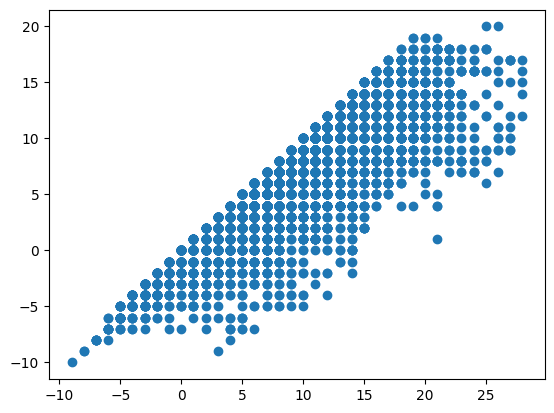

In [ ]:
# Plot the tmpc against the dwpc data
import matplotlib.pyplot as plt

plt.scatter(x= df['tmpc'], y=df['dwpc'])

plt.show()

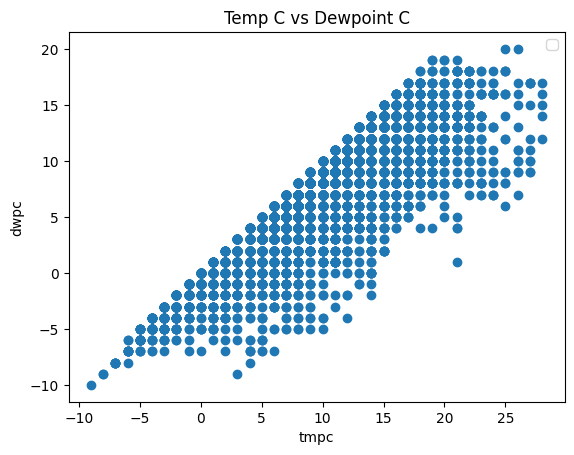

In [ ]:
# Make the plot more appealing
import matplotlib.pyplot as plt
plt.title('Temp C vs Dewpoint C')
plt.xlabel('tmpc')
plt.ylabel('dwpc')
plt.legend()
plt.scatter(x= df['tmpc'], y=df['dwpc'])
plt.show()

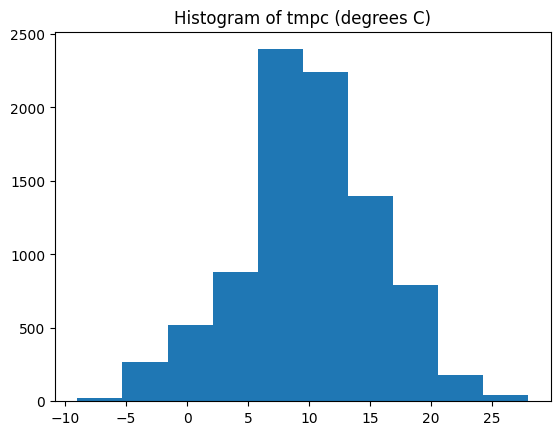

In [ ]:
# Histogram
plt.hist(df['tmpc'])
plt.title('Histogram of tmpc (degrees C)')
plt.show()


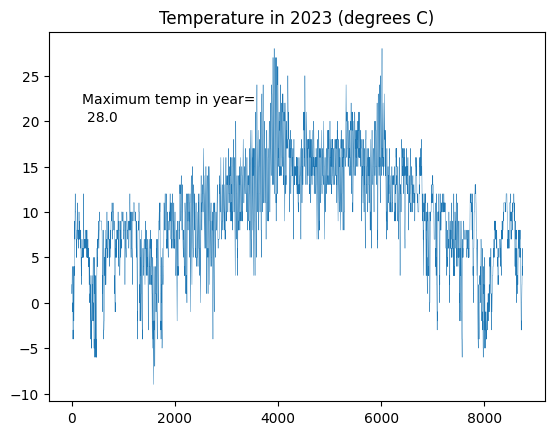

In [ ]:
# Line plot with some data annotations
import numpy as np
max = np.max(df['tmpc'])
plt.plot(df['tmpc'], linewidth=0.3)
plt.title('Temperature in 2023 (degrees C)')
plt.text(200, 22, "Maximum temp in year=")
plt.text(300,20, max)
plt.show()

In [ ]:
# How to build all this into a report structur
# Downloading the file(s)
# Correlation
# Seasonality
# Gap filling
# Comparing sites (e.g. Glasgow in 2023 vs Glasgow in 1970- average temp)
